In [5]:
import pandas as pd
import config
import slm_utils
import miscellaneous_utils as mu
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import linregress

In [6]:
def return_fst(host):
    
    pi_dir = "%s/pi/Poyet/%s" % (config.analysis_directory,host)
    
    good_species = [s[:-7] for s in os.listdir(pi_dir)]
    dates = mu.return_dates(host)

    all_samples = mu.return_host_samples(host)

    pi_df_BT = pd.DataFrame(columns=all_samples,index=good_species)
    pi_df_W = pd.DataFrame(columns=all_samples,index=good_species)

    for spc in good_species:
        pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,spc),index_col=0)
        pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
        pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
        species_dates = dates.loc[pi_df.index].sort_values()
        first_date = species_dates.index[0]
        pi_df_BT.loc[spc] = pi_df_T.loc[first_date]
        pi_df_W.loc[spc] = np.diag(pi_df_T)

    
    pi_df_W = pi_df_W.loc[:,[d for d in dates.index if d in pi_df_W.columns]]
    pi_df_BT = pi_df_BT.loc[:,[d for d in dates.index if d in pi_df_BT.columns]]
    
    ## threshold by minimum number of samples being greater than 25, as in the strain inference parts of the paper
    pi_df_W = pi_df_W.loc[pi_df_W.T.notna().sum() > 25]
    pi_df_BT = pi_df_BT.loc[pi_df_W.index]

    ## calculate the mean between host (BH) diversity of each species, from inter-sample pi in HMP

    BH = {}
    for spcs in pi_df_W.index:
        pi_df_BH = pd.read_csv("/u/home/r/rwolff/diversity_ecology/analysis/pi/HMP1-2/%s/%s_pi.txt" % (spcs,spcs),index_col=0)
        xz = zip(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[0],(np.triu_indices(n=pi_df_BH.shape[0],m=pi_df_BH.shape[1])[1]))
        xz = list(xz)
        BH[spcs] = 1-(pi_df_BH.values[xz].ravel().mean()-np.diag(pi_df_BH.values).mean())/pi_df_BH.values[xz].ravel().mean()
    
    BH = pd.Series(BH)
    
    Fst = 1-(pi_df_BT - pi_df_W)/pi_df_BT
    
    Fst = (BH/Fst.T).T
    return(Fst)

In [3]:
host = "am"
pi_dir = "%s/pi/Poyet/%s" % (config.analysis_directory,host)
spc = "Bacteroides_xylanisolvens_57185"
pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,spc),index_col=0)

In [ ]:
#pi_df = pi_df.drop("SRR9224141",axis=0).drop("SRR9224141",axis=1)

In [ ]:
#pi_df.to_csv("%s/%s_pi.txt" % (pi_dir,spc))

In [53]:
host = "am"
Fst = return_fst(host)
dates = mu.return_dates(host)

In [49]:
Fst

,SRR9224432,SRR9224402,SRR9224395,SRR9224396,SRR9224393,SRR9224394,SRR9224399,SRR9224400,SRR9224397,SRR9224398,...,SRR9224302,SRR9224309,SRR9224310,SRR9224420,SRR9224419,SRR9224418,SRR9224417,SRR9224416,SRR9224415,SRR9224414
Eubacterium_rectale_56927,0.210638,0.24979,0.250559,NaN,0.24744,NaN,NaN,0.244945,NaN,0.227383,...,0.226984,NaN,NaN,NaN,0.250881,NaN,0.22547,NaN,0.218149,NaN
Alistipes_putredinis_61533,0.098176,0.101408,0.111627,0.104216,0.114902,0.109517,0.109438,0.12087,0.111185,0.117022,...,0.084859,0.090826,0.092715,0.092233,0.101271,0.123425,0.109036,0.093716,0.089918,0.083014
Alistipes_onderdonkii_55464,0.116638,0.147788,0.134273,0.154508,0.131658,0.131621,0.131797,0.138596,0.142356,0.131682,...,NaN,0.157737,0.153856,NaN,0.152606,0.152544,0.139659,0.1593,NaN,NaN
Bacteroides_uniformis_57318,0.137185,0.148028,0.144394,0.157205,0.153604,0.145197,0.148784,0.144795,0.149588,0.14631,...,0.138133,0.146284,0.150673,0.129838,0.132064,0.165272,0.151317,0.144283,0.14145,0.132319
Bacteroides_massiliensis_44749,0.163257,0.171537,0.175525,0.17494,0.173429,0.176234,0.174263,0.19006,0.172854,0.179448,...,0.125608,0.147797,0.148693,0.126313,0.131467,0.18237,0.175449,0.155353,0.182404,0.120117
Bacteroides_vulgatus_57955,0.178624,0.190663,0.194552,0.199588,0.198664,0.184324,0.176782,0.168005,0.178952,0.192453,...,0.162849,0.153919,0.167132,0.152865,0.137311,0.167771,0.157724,0.150977,0.170858,0.155067
Bacteroides_thetaiotaomicron_56941,0.166697,0.188307,0.185439,0.187846,0.195162,0.192418,0.206089,0.188378,0.187736,0.221073,...,0.215113,0.216459,0.209922,NaN,0.214829,0.204048,0.200053,0.208485,0.217588,NaN
Bacteroides_ovatus_58035,0.222104,0.213204,0.231695,0.265753,0.294346,0.255315,0.353115,0.266714,0.256576,0.320564,...,0.18727,0.194833,0.19466,NaN,0.17779,0.22356,0.204305,0.187215,0.182861,0.198218
Bacteroides_cellulosilyticus_58046,0.091501,0.106317,0.104258,NaN,0.109934,0.113543,0.105895,0.113666,0.113239,0.106124,...,NaN,NaN,NaN,NaN,NaN,NaN,0.118721,NaN,NaN,NaN


In [4]:
def return_LR(X):

    df_LR = pd.DataFrame(0,index=X.index,columns=["slope","intercept","r_value","p_value","std_err"])

    for species in X.index:
        y_df = X.loc[species]
        y_df = y_df.loc[y_df.notna()]
        x = dates.loc[y_df.index].values 
        y = y_df.values

        x = x.astype(float)[1:]
        y = y.astype(float)[1:]

        LR = linregress(x, y)

        df_LR.loc[species] = list(LR)
    return(df_LR)

In [5]:
def get_hurst_exponent(time_series, max_lag=25):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [ ]:
H = {}
for s in Fst.index:
    H[s] = get_hurst_exponent(Fst.loc[s].dropna().values)


In [ ]:
H

In [ ]:
plt.plot(Fst.loc['Faecalibacterium_prausnitzii_61481'].dropna().values)

In [ ]:
df_LR = return_LR(Fst)

In [ ]:
1 - (np.logical_and(df_LR["p_value"] < .05,df_LR["slope"] > 0))

In [ ]:
(df_LR["p_value"] > .05)

In [ ]:
(np.logical_and(df_LR["p_value"] < .05,df_LR["slope"] > 0))

In [37]:
df_strains = pd.read_csv("strains_%s.csv" % host,index_col=0)

In [ ]:
df_strains = df_strains.loc[df_strains.T.notna().sum() > 25]

In [ ]:
df_LR = return_LR(df_strains)

In [ ]:
(df_LR["p_value"] >.05).mean()

In [ ]:
H = {}
for s in df_strains.index:
    H[s] = get_hurst_exponent(df_strains.loc[s].dropna().values)


In [6]:
from statsmodels.tsa.stattools import adfuller


In [4]:
H = {}
for s in Fst.index:
    H[s] = adfuller(Fst.loc[s].dropna().values)[1]

NameError: name 'Fst' is not defined

In [43]:
H = {}
for s in df_strains.index:
    H[s] = adfuller(df_strains.loc[s].dropna().values)[1]



In [55]:
H

{'Phascolarctobacterium_sp_59817': 0.7495577990576427,
 'Faecalibacterium_prausnitzii_57453': 3.645269821342896e-06,
 'Ruminococcus_bromii_62047': 3.0296004463272185e-12,
 'Bacteroides_uniformis_57318': 0.005975502867721754,
 'Ruminococcus_bicirculans_59300': 2.5957948333964205e-12,
 'Bacteroides_xylanisolvens_57185': 3.777661663595768e-11,
 'Eubacterium_rectale_56927': 5.119268441958055e-15,
 'Bacteroides_ovatus_58035': 3.281425490349193e-08,
 'Bacteroides_vulgatus_57955': 1.5270719267935705e-09,
 'Parabacteroides_merdae_56972': 0.055428407198155415,
 'Bacteroides_stercoris_56735': 1.723919322652217e-19,
 'Bacteroides_fragilis_54507': 7.197305591000913e-17}

In [56]:
(pd.Series(H) < .05).mean()

0.8333333333333334

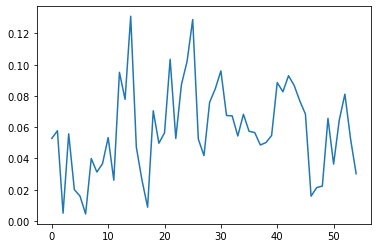

In [42]:
plt.plot(df_strains.loc['Bacteroides_uniformis_57318_A'].dropna().values)

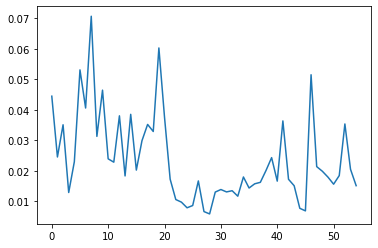

In [41]:
plt.plot(df_strains.loc['Bacteroides_uniformis_57318_B'].dropna().values)

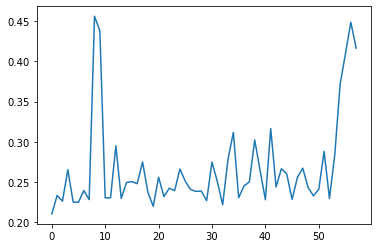

In [31]:
plt.plot(Fst.loc['Eubacterium_rectale_56927'].dropna().values)

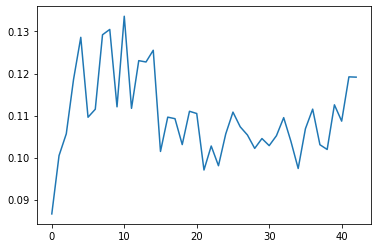

In [32]:
plt.plot(Fst.loc['Sutterella_wadsworthensis_56828'].dropna().values)

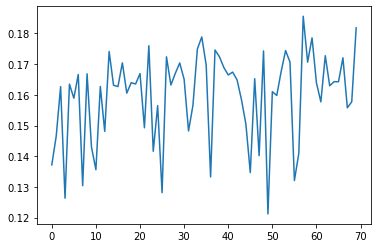

In [20]:
plt.plot(Fst.loc['Bacteroides_uniformis_57318'].dropna().values)